In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import os
import seaborn as sns

In [ ]:

path = 'D:/Daniel/Lab_KHDL/Final_Project/Data/'
frames = []   
for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df1 = pd.read_csv(file_path, encoding='utf-8-sig')
        frames.append(df1)

result = pd.concat(frames, ignore_index=True)

result.to_csv('dataFinal.csv', index=False, encoding='utf-8-sig')

In [72]:
df = pd.read_csv('/content/dataFinal.csv')
df.head()

,Tiêu đề,Diện tích(m2),Số phòng ngủ,Số Phòng WC,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Hướng nhà,Hướng ban công,Loại nhà,Giá,Link,Số phòng WC
0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,150.0,2.0,1.0,10/12/2023,TP Hồ Chí Minh,Nhà Bè,NaN,NaN,Bán Nhà riêng,3.899000e+09,https://batdongsan.vn/chua-toi-30trm2-hang-ngo...,NaN
1,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ...",51.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Tân Bình,NaN,NaN,Bán Nhà riêng,5.500000e+00,https://batdongsan.vn/ban-nha-hxh-au-co-phuong...,NaN
2,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ...",45.0,2.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,NaN,NaN,Bán Nhà,4.600000e+00,https://batdongsan.vn/sat-mat-tien-phan-dang-l...,NaN
3,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...,41.0,NaN,NaN,10/12/2023,TP Hồ Chí Minh,Quận 5,NaN,NaN,Bán Nhà riêng,7.350000e+00,https://batdongsan.vn/chu-gap-ban-truoc-tet-le...,NaN
4,"LŨY BÁN BÍCH,TÂN PHÚ-DIỆN TÍCH KHỦNG 96M2 ( 4....",96.0,2.0,1.0,07/12/2023,TP Hồ Chí Minh,Tân Phú,NaN,NaN,Bán Nhà riêng,NaN,https://batdongsan.vn/luy-ban-bichtan-phu-dien...,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9809 entries, 0 to 9808
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         9805 non-null   object 
 1   Diện tích(m2)   8863 non-null   float64
 2   Số phòng ngủ    6125 non-null   float64
 3   Số Phòng WC     1393 non-null   float64
 4   Thời gian đăng  9805 non-null   object 
 5   Tỉnh/Thành      9804 non-null   object 
 6   Quận/Huyện      9804 non-null   object 
 7   Hướng nhà       1341 non-null   object 
 8   Hướng ban công  851 non-null    object 
 9   Loại nhà        9804 non-null   object 
 10  Giá             8798 non-null   float64
 11  Link            9809 non-null   object 
 12  Số phòng WC     4184 non-null   float64
dtypes: float64(5), object(8)
memory usage: 996.4+ KB


In [74]:
# Loai bo giá trị trùng lặp
df = df.drop_duplicates(subset='Tiêu đề', keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8948 entries, 0 to 9808
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         8947 non-null   object 
 1   Diện tích(m2)   8177 non-null   float64
 2   Số phòng ngủ    5657 non-null   float64
 3   Số Phòng WC     1261 non-null   float64
 4   Thời gian đăng  8947 non-null   object 
 5   Tỉnh/Thành      8946 non-null   object 
 6   Quận/Huyện      8946 non-null   object 
 7   Hướng nhà       1244 non-null   object 
 8   Hướng ban công  789 non-null    object 
 9   Loại nhà        8946 non-null   object 
 10  Giá             8012 non-null   float64
 11  Link            8948 non-null   object 
 12  Số phòng WC     3877 non-null   float64
dtypes: float64(5), object(8)
memory usage: 978.7+ KB


In [75]:
df = df.drop(df.columns[3], axis=1)

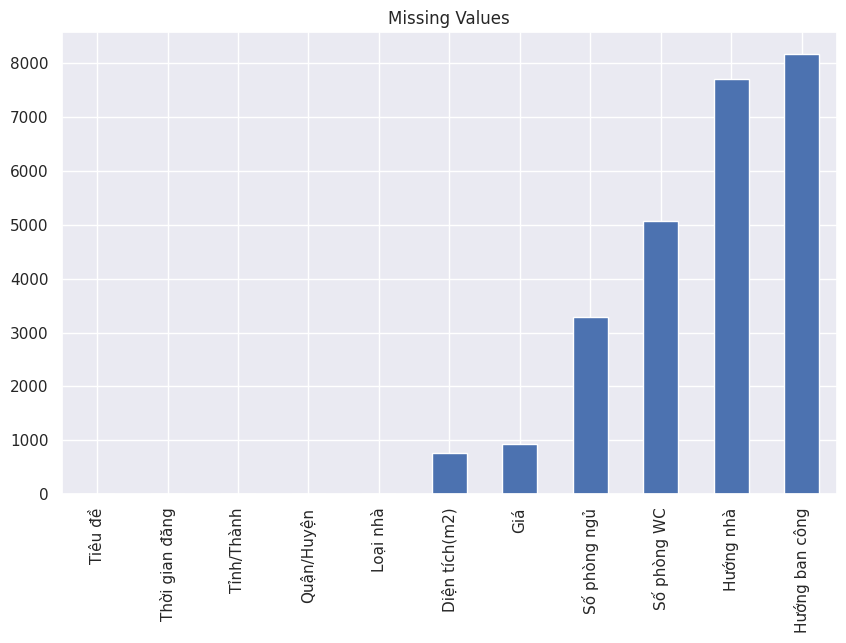

In [76]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10, 6))
missing.plot.bar()
plt.title('Missing Values')
plt.show()

In [77]:
# df = df.drop(['Tiêu đề', 'Hướng nhà', 'Hướng ban công', 'Link'], axis=1)

In [78]:
df = df.dropna(subset=['Giá'])
df = df.dropna(subset=['Diện tích(m2)'])
df = df.dropna(subset=['Số phòng ngủ'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5346 entries, 0 to 9808
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tiêu đề         5346 non-null   object 
 1   Diện tích(m2)   5346 non-null   float64
 2   Số phòng ngủ    5346 non-null   float64
 3   Thời gian đăng  5346 non-null   object 
 4   Tỉnh/Thành      5346 non-null   object 
 5   Quận/Huyện      5346 non-null   object 
 6   Hướng nhà       1102 non-null   object 
 7   Hướng ban công  736 non-null    object 
 8   Loại nhà        5346 non-null   object 
 9   Giá             5346 non-null   float64
 10  Link            5346 non-null   object 
 11  Số phòng WC     3550 non-null   float64
dtypes: float64(4), object(8)
memory usage: 543.0+ KB


In [79]:
df['Số phòng WC'].unique()

array([ nan,   2.,   4.,   3.,   6.,   5.,   1.,  12.,  13.,   9.,   7.,
        28.,   8.,  19.,  20.,  10.,  24.,  11.,  48.,  23.,  21.,  18.,
       127.,  14.,  15.,  22.,  38.,  26.,  16.,  17., 111.])

In [80]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

df['Số phòng WC'] = knn_imputer.fit_transform(df[['Số phòng WC']]).astype(int)

missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
  print('All missing values have been imputed.')
else:
  print('There are still missing values in the following columns:')
  print(missing)


There are still missing values in the following columns:
Hướng nhà         4244
Hướng ban công    4610
dtype: int64


In [81]:
df['Số phòng WC'].unique()

array([  3,   2,   4,   6,   5,   1,  12,  13,   9,   7,  28,   8,  19,
        20,  10,  24,  11,  48,  23,  21,  18, 127,  14,  15,  22,  38,
        26,  16,  17, 111])

In [82]:
df = df.drop(['Tiêu đề', 'Hướng nhà', 'Hướng ban công', 'Link'], axis=1)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5346 entries, 0 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   5346 non-null   float64
 1   Số phòng ngủ    5346 non-null   float64
 2   Thời gian đăng  5346 non-null   object 
 3   Tỉnh/Thành      5346 non-null   object 
 4   Quận/Huyện      5346 non-null   object 
 5   Loại nhà        5346 non-null   object 
 6   Giá             5346 non-null   float64
 7   Số phòng WC     5346 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 375.9+ KB


In [84]:
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])
print(numeric_features.columns)
print(categorical_features.columns)

Index(['Diện tích(m2)', 'Số phòng ngủ', 'Giá', 'Số phòng WC'], dtype='object')
Index(['Thời gian đăng', 'Tỉnh/Thành', 'Quận/Huyện', 'Loại nhà'], dtype='object')


In [85]:
# Chuyen cot 'Giá' ve cuoi
col_to_move = df.columns[6]
new_column_order = [col for col in df.columns if col != col_to_move] + [col_to_move]

df = df[new_column_order]
df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá
0,150.0,2.0,10/12/2023,TP Hồ Chí Minh,Nhà Bè,Bán Nhà riêng,3,3.899000e+09
2,45.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,3,4.600000e+00
5,40.0,4.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3,3.950000e+00
9,425.0,6.0,08/12/2023,Hải Phòng,Ngô Quyền,Bán Nhà mặt phố,3,1.700000e+01
11,42.0,4.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,3,5.290000e+00


In [86]:
correlation = numeric_features.corr()
correlation['Giá'].sort_values(ascending=False)

Giá              1.000000
Diện tích(m2)    0.991810
Số phòng WC      0.011645
Số phòng ngủ     0.004224
Name: Giá, dtype: float64

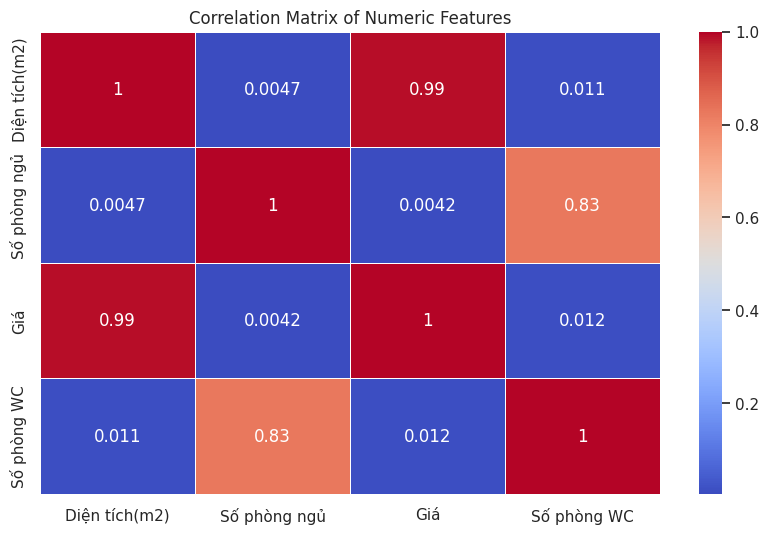

In [87]:

sns.heatmap(correlation, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


<Axes: ylabel='Số phòng ngủ'>

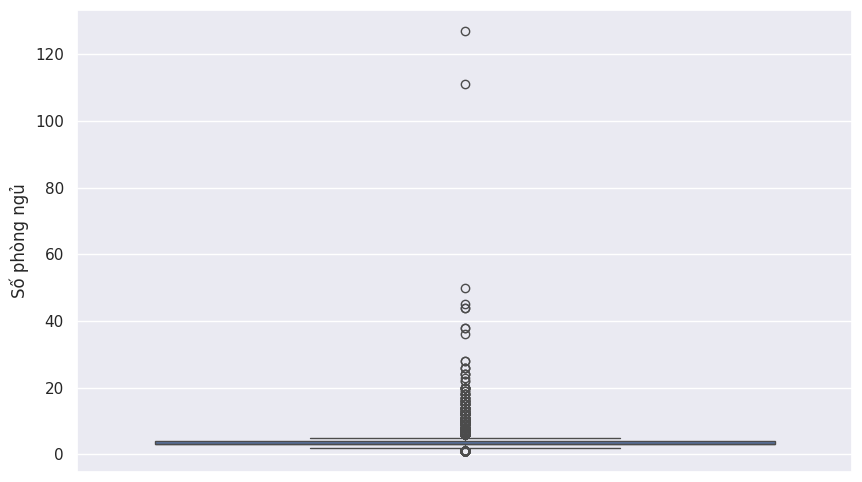

In [88]:
sns.boxplot(df['Số phòng ngủ'])

<Axes: ylabel='Số phòng WC'>

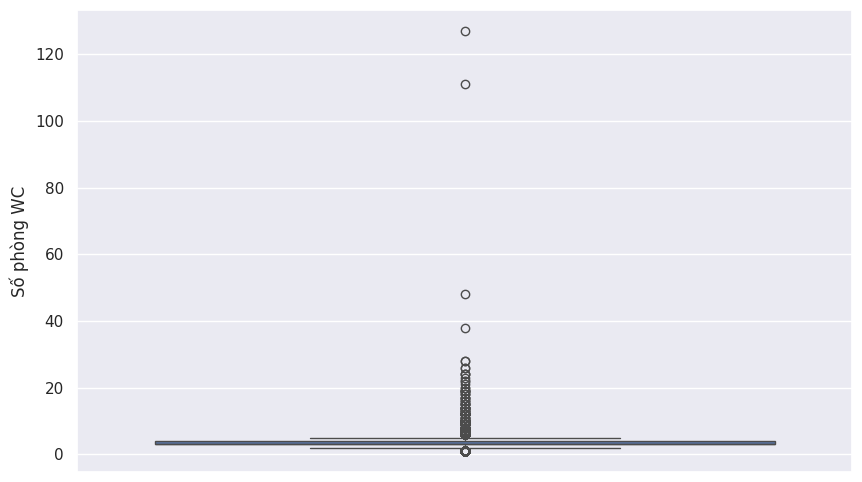

In [89]:
sns.boxplot(df['Số phòng WC'])

Text(0.5, 1.0, 'Số phòng WC vs Số phòng ngủ')

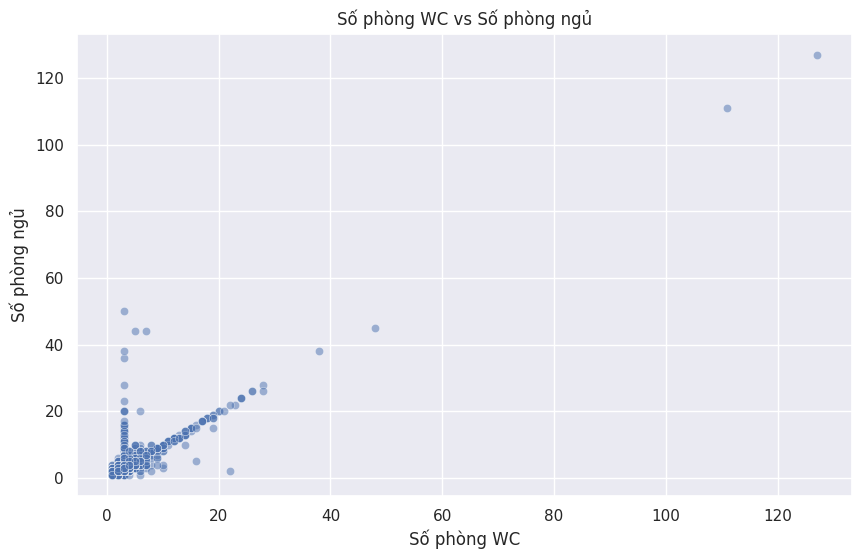

In [90]:
sns.scatterplot(x=df['Số phòng WC'], y=df['Số phòng ngủ'], alpha=0.5)
plt.xlabel('Số phòng WC')
plt.ylabel('Số phòng ngủ')
plt.title('Số phòng WC vs Số phòng ngủ')

<ipython-input-91-129b6e4d19c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Giá'])


<Axes: xlabel='Giá', ylabel='Density'>

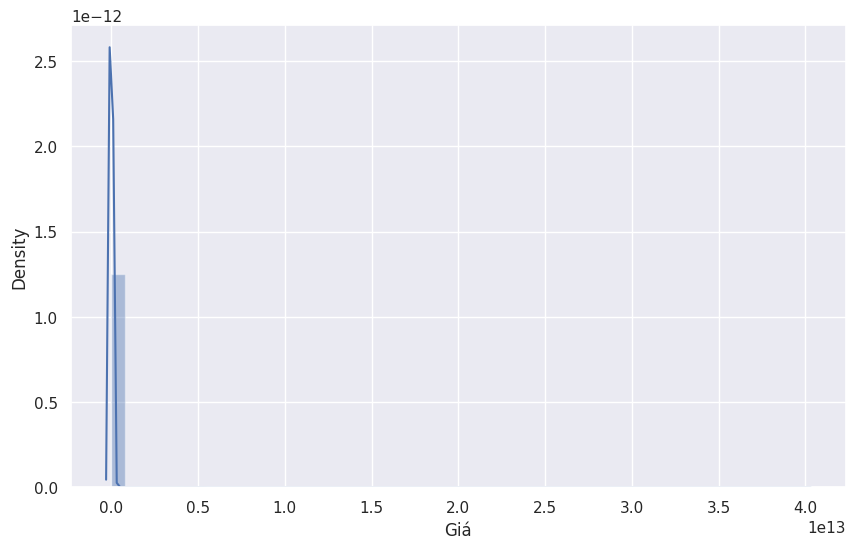

In [91]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(df['Giá'])

<ipython-input-92-b047291746bc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Giá'])


<Axes: xlabel='Giá', ylabel='Density'>

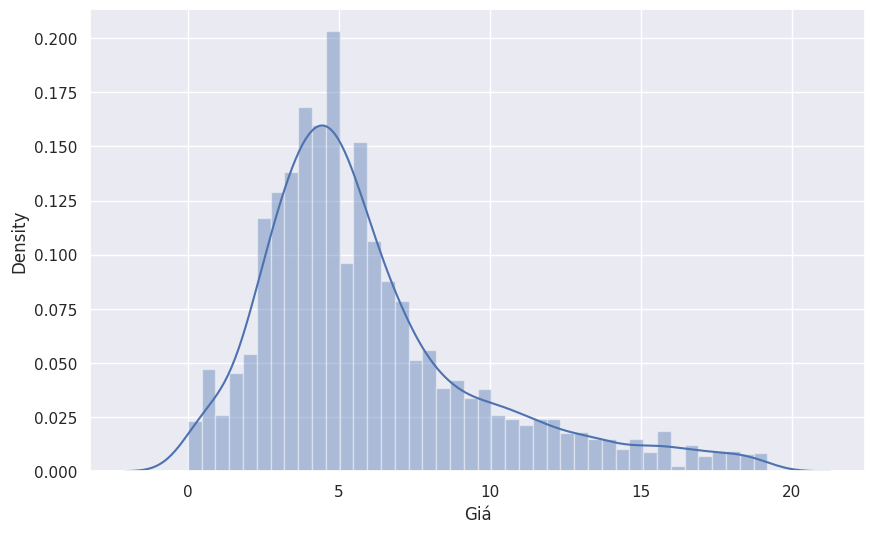

In [92]:
Q1 = df['Giá'].quantile(0.25)
Q3 = df['Giá'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df = df[df['Giá'] <= upper_bound]

sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(df['Giá'])

In [97]:
# Tính cột mật độ giá/diện tích bằng cách sử dụng .loc
df.loc[:, 'Mật độ giá/Diện tích'] = df['Giá'] / df['Diện tích(m2)']

# Tính mật độ giá trung bình cho từng tỉnh/thành
avg_density = df.groupby('Tỉnh/Thành')['Mật độ giá/Diện tích'].mean().reset_index()
avg_density.columns = ['Tỉnh/Thành', 'Mật độ giá trung bình']

In [98]:
avg_density

,Tỉnh/Thành,Mật độ giá trung bình
0,An Giang,0.031432
1,Bà Rịa Vũng Tàu,0.037910
2,Bình Dương,0.040338
3,Bình Phước,0.004353
4,Bình Thuận,0.000018
5,Bình Định,0.048352
6,Bắc Ninh,0.045556
7,Bến Tre,0.028000
8,Cần Thơ,0.028081
9,Hà Nội,0.141363


In [103]:
grouped_data = df.groupby("Tỉnh/Thành").apply(lambda x: x['Giá'].sum() *1000 / x['Diện tích(m2)'].sum())
TinhThanh_df = grouped_data.reset_index()
TinhThanh_df.columns.values[1] = "Triệu/m2"
TinhThanh_df

,Tỉnh/Thành,Triệu/m2
0,An Giang,34.651163
1,Bà Rịa Vũng Tàu,25.010753
2,Bình Dương,39.814912
3,Bình Phước,4.430845
4,Bình Thuận,0.018023
5,Bình Định,52.173913
6,Bắc Ninh,45.555556
7,Bến Tre,28.000000
8,Cần Thơ,18.924731
9,Hà Nội,135.310708


In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Line chart
sns.lineplot(data=TinhThanh_df, x="Tỉnh/Thành", y="Triệu/m2", ax=ax)
ax.set_xlabel("Tỉnh/Thành")
ax.set_ylabel("Triệu/m2")
ax.set_title("Line Chart of Price per Square Meter by Province/City")
ax.tick_params(axis='x', rotation=90)

# Column chart
sns.barplot(data=TinhThanh_df, x="Tỉnh/Thành", y="Triệu/m2", ax=ax, color="orange", alpha=0.5)

# Show the plot
plt.show()


In [104]:
# Cập nhật dữ liệu ở hàng thứ hai (index 1) và cột 'Tỉnh/Thành'
TinhThanh_df.loc[1, 'Tỉnh/Thành'] = 'Bà Rịa - Vũng Tàu'
TinhThanh_df.loc[24, 'Tỉnh/Thành'] = 'Hồ Chí Minh city'

In [105]:
TinhThanh_df

,Tỉnh/Thành,Triệu/m2
0,An Giang,34.651163
1,Bà Rịa - Vũng Tàu,25.010753
2,Bình Dương,39.814912
3,Bình Phước,4.430845
4,Bình Thuận,0.018023
5,Bình Định,52.173913
6,Bắc Ninh,45.555556
7,Bến Tre,28.000000
8,Cần Thơ,18.924731
9,Hà Nội,135.310708


## Vẽ biểu đồ Heatmap trên bản đồ Việt Nam

In [106]:
import json
import plotly.express as px
import plotly.io as pio

In [ ]:
# Mở file với mã hóa utf-8
with open("vietnam-with-regions_.geojson", 'r', encoding='utf-8') as f:
    try:
        # Đọc nội dung của file JSON
        vietnam = json.load(f)
        # In ra một phần nội dung để kiểm tra
        print(vietnam)
    except Exception as e:
        print("Đã xảy ra lỗi:", str(e))

In [ ]:
vietnam['features'][59]

In [ ]:
vietnam['features'][0]['properties']['name']

In [ ]:
state_id_map = {}
for i in range(0,63):
    state_id_map[vietnam['features'][i]['properties']['name']] = vietnam['features'][i]['id']

In [ ]:
state_id_map

In [ ]:
TinhThanh_df["id"] = TinhThanh_df["Tỉnh/Thành"].apply(lambda x: state_id_map[x])

In [ ]:
TinhThanh_df

In [ ]:
fig = px.choropleth_mapbox(
    avg_density,
    geojson=vietnam,
    locations='id',
    color='Mật độ giá trung bình',
    hover_name='Tỉnh/Thành',
    hover_data=['Mật độ giá trung bình'],
    #featureidkey='properties.id',
    mapbox_style="carto-positron",
    center={"lat": 14.0583, "lon": 108.2772},
    zoom=4,
    opacity=0.5
)

# Chọn renderer phù hợp
pio.renderers.default = "vscode"  # Hoặc "notebook" nếu bạn dùng Jupyter notebook
fig.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4640 entries, 2 to 9808
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diện tích(m2)   4640 non-null   float64
 1   Số phòng ngủ    4640 non-null   float64
 2   Thời gian đăng  4640 non-null   object 
 3   Tỉnh/Thành      4640 non-null   object 
 4   Quận/Huyện      4640 non-null   object 
 5   Loại nhà        4640 non-null   object 
 6   Số phòng WC     4640 non-null   int64  
 7   Giá             4640 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 326.2+ KB


### Encoding variable

In [26]:
# features generate
def generate_feature(df):
  df['Số phòng'] = df['Số phòng ngủ'] + df['Số phòng WC']
  df['Tỷ lệ phòng ngủ/tổng số phòng'] = df['Số phòng ngủ'] / df['Số phòng']
  df['Tỷ lệ phòng WC/tổng số phòng'] = df['Số phòng WC'] / df['Số phòng']
  return df

df = generate_feature(df)
df.head()


,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng,Tỷ lệ phòng WC/tổng số phòng
2,45.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,3,4.60,5.0,0.400000,0.600000
5,40.0,4.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3,3.95,7.0,0.571429,0.428571
9,425.0,6.0,08/12/2023,Hải Phòng,Ngô Quyền,Bán Nhà mặt phố,3,17.00,9.0,0.666667,0.333333
11,42.0,4.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,3,5.29,7.0,0.571429,0.428571
12,39.0,4.0,08/12/2023,Hà Nội,Ba Đình,Bán Nhà riêng,3,8.60,7.0,0.571429,0.428571


In [27]:
df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng,Tỷ lệ phòng WC/tổng số phòng
2,45.0,2.0,10/12/2023,TP Hồ Chí Minh,Phú Nhuận,Bán Nhà,3,4.60,5.0,0.400000,0.600000
5,40.0,4.0,08/12/2023,Hà Nội,Hà Đông,Bán Nhà riêng,3,3.95,7.0,0.571429,0.428571
9,425.0,6.0,08/12/2023,Hải Phòng,Ngô Quyền,Bán Nhà mặt phố,3,17.00,9.0,0.666667,0.333333
11,42.0,4.0,08/12/2023,Hà Nội,Tây Hồ,Bán Nhà riêng,3,5.29,7.0,0.571429,0.428571
12,39.0,4.0,08/12/2023,Hà Nội,Ba Đình,Bán Nhà riêng,3,8.60,7.0,0.571429,0.428571


In [28]:
from sklearn.preprocessing import LabelEncoder

le_time = LabelEncoder()
df['Thời gian đăng'] = le_time.fit_transform(df['Thời gian đăng'])
le_city = LabelEncoder()
df['Tỉnh/Thành'] = le_city.fit_transform(df['Tỉnh/Thành'])
le_district = LabelEncoder()
df['Quận/Huyện'] = le_district.fit_transform(df['Quận/Huyện'])
le_house_type = LabelEncoder()
df['Loại nhà'] = le_house_type.fit_transform(df['Loại nhà'])

df.head()

,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng,Tỷ lệ phòng WC/tổng số phòng
2,45.0,2.0,76,20,55,1,3,4.60,5.0,0.400000,0.600000
5,40.0,4.0,63,9,32,4,3,3.95,7.0,0.571429,0.428571
9,425.0,6.0,63,11,45,3,3,17.00,9.0,0.666667,0.333333
11,42.0,4.0,63,9,88,4,3,5.29,7.0,0.571429,0.428571
12,39.0,4.0,63,9,1,4,3,8.60,7.0,0.571429,0.428571


### Scale dữ liệu về cùng tỉ lệ để đưa vào model

In [29]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
scaler = StandardScaler()

# Get the list of columns to be scaled
columns_to_scale = df.columns.tolist()
columns_to_scale.remove('Giá')

# Fit the scaler to the data and transform it
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the scaled data
df_scaled.head()


,Diện tích(m2),Số phòng ngủ,Thời gian đăng,Tỉnh/Thành,Quận/Huyện,Loại nhà,Số phòng WC,Giá,Số phòng,Tỷ lệ phòng ngủ/tổng số phòng,Tỷ lệ phòng WC/tổng số phòng
2,-0.059621,-0.743711,-0.514890,0.664814,0.180762,-3.856098,-0.18179,4.60,-0.533868,-1.449964,1.449964
5,-0.069897,0.149936,-0.718311,-1.123344,-0.551340,0.449765,-0.18179,3.95,0.000634,0.645041,-0.645041
9,0.721342,1.043583,-0.718311,-0.798225,-0.137543,-0.985523,-0.18179,17.00,0.535136,1.808933,-1.808933
11,-0.065787,0.149936,-0.718311,-1.123344,1.231168,0.449765,-0.18179,5.29,0.000634,0.645041,-0.645041
12,-0.071952,0.149936,-0.718311,-1.123344,-1.538085,0.449765,-0.18179,8.60,0.000634,0.645041,-0.645041


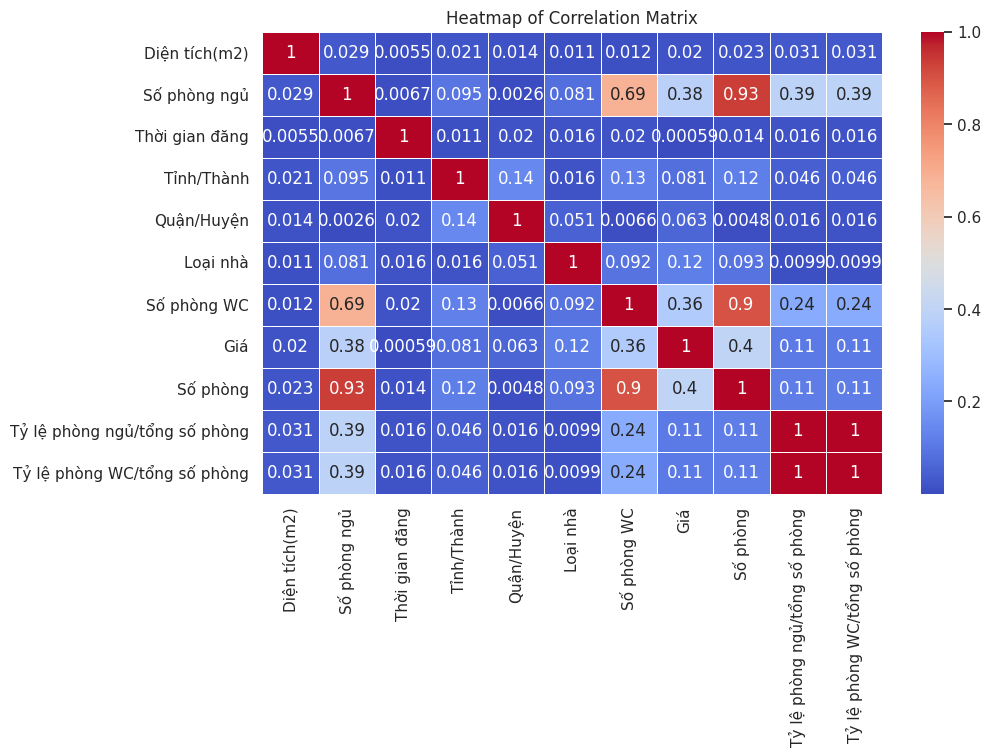

In [30]:

# Get the correlation matrix
correlation_matrix = df_scaled.corr().abs()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm')

# Set the title
plt.title('Heatmap of Correlation Matrix')

# Show the plot
plt.show()


In [31]:
df_scaled.drop(columns=['Thời gian đăng'], inplace=True)

In [32]:
X = df_scaled.drop(columns=['Giá']).values
y = df_scaled['Giá'].values

In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)

(3712, 9)
(928, 9)


### Xây dựng model Regression bằng pytorch

In [35]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)

In [36]:
class HousePriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = HousePriceModel(input_dim)

In [37]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Huấn luyện model

In [38]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [100/1000], Loss: 15.5298
Epoch [200/1000], Loss: 12.5348
Epoch [300/1000], Loss: 11.4025
Epoch [400/1000], Loss: 10.5831
Epoch [500/1000], Loss: 10.1859
Epoch [600/1000], Loss: 9.4596
Epoch [700/1000], Loss: 8.8653
Epoch [800/1000], Loss: 8.3183
Epoch [900/1000], Loss: 8.0157
Epoch [1000/1000], Loss: 7.6876


In [39]:
model.eval()
with torch.no_grad():
    y_pred = model(X_train_tensor)

    mse = mean_squared_error(y_train_tensor.numpy(), y_pred.numpy())
    mae = mean_absolute_error(y_train_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_train_tensor.numpy(), y_pred.numpy())

print("Evaluation on train set:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Evaluation on train set:
Mean Squared Error: 6.830075263977051
Mean Absolute Error: 1.8202974796295166
R² Score: 0.517142229662911


In [40]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)

    mse = mean_squared_error(y_test_tensor.numpy(), y_pred.numpy())
    mae = mean_absolute_error(y_test_tensor.numpy(), y_pred.numpy())
    r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

print("Evaluation on test set:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Evaluation on test set:
Mean Squared Error: 6.662147045135498
Mean Absolute Error: 1.7959662675857544
R² Score: 0.4971446606106391


### Dùng thử các model khác

In [41]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Define list of models
models = [
    LinearRegression(),
    Ridge(alpha=0.1, random_state=42),
    Lasso(alpha=0.1, random_state=42)
]
for model in models:
    model.fit(X_train, y_train)

    # Evaluate model on training data
    train_preds = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)

    # Evaluate model on test data
    test_preds = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)

    print(f"Model: {model.__class__.__name__}")
    print("Training performance:")
    print(f"MSE: {train_mse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R2-score: {train_r2:.4f}")
    print("Testing performance:")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R2-score: {test_r2:.4f}")
    print()

Model: LinearRegression
Training performance:
MSE: 11.8165
MAE: 2.4805
R2-score: 0.1646
Testing performance:
MSE: 10.0080
MAE: 2.3115
R2-score: 0.2446

Model: Ridge
Training performance:
MSE: 11.8165
MAE: 2.4805
R2-score: 0.1646
Testing performance:
MSE: 10.0080
MAE: 2.3115
R2-score: 0.2446

Model: Lasso
Training performance:
MSE: 11.8830
MAE: 2.4979
R2-score: 0.1599
Testing performance:
MSE: 10.1844
MAE: 2.3329
R2-score: 0.2313



##### *Các mô hình hồi quy được sử dụng cho ra kết quả rất thấp chot thấy đang bị underfitting nên sẽ giải quyết bằng cách dùng các mô hình khác*

In [43]:
# Using Decision tree model

# Define a list of hyperparameters to experiment with
hyperparameters = {
    'max_depth': [None, 1, 3, 5, 7, 10, 20]
}

# Initialize an empty list to store the results
results = []

# Loop over each combination of hyperparameters

for max_depth in hyperparameters['max_depth']:
   # Create a new DecisionTreeRegressor object with the current hyperparameters
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the train data
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate the model on the test data
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store the results in a dictionary
    results.append({
        'max_depth': max_depth,
        'mse-test': mse_test,
        'mae-test': mae_test,
        'r2-test': r2_test,
        'mse-train': mse_test,
        'mae-train': mae_train,
        'r2-train': r2_train
    })



# Print the results
for result in results:
    print(result)


{'max_depth': None, 'mse-test': 8.927602416186863, 'mae-test': 1.8586074781994828, 'r2-test': 0.3261493233585353, 'mse-train': 8.927602416186863, 'mae-train': 0.19677075371039002, 'r2-train': 0.9748816789790491}
{'max_depth': 1, 'mse-test': 10.338030132218952, 'mae-test': 2.397316721800833, 'r2-test': 0.21969099037107243, 'mse-train': 10.338030132218952, 'mae-train': 2.4500862819082503, 'r2-train': 0.2006173785007943}
{'max_depth': 3, 'mse-test': 8.874661007468363, 'mae-test': 2.1632363657196914, 'r2-test': 0.33014531269858816, 'mse-train': 8.874661007468363, 'mae-train': 2.1862387434952373, 'r2-train': 0.3347771662757294}
{'max_depth': 5, 'mse-test': 8.055682567222826, 'mae-test': 1.993959662032031, 'r2-test': 0.3919613692821138, 'mse-train': 8.055682567222826, 'mae-train': 1.9374105766496776, 'r2-train': 0.439472888764062}
{'max_depth': 7, 'mse-test': 7.027202150700004, 'mae-test': 1.813241953208691, 'r2-test': 0.4695905234803144, 'mse-train': 7.027202150700004, 'mae-train': 1.709007

#### *Có thể nhận thấy rằng với max_depth=5 cho ra kết quả tốt nhất vì điểm đánh giá trên cả train và test đêu không có quá nhiều chênh lệch nên sẽ tránh được Overfitting và underfitting*

### Sử dụng các phơng pháp Ensemble learning để cải thiện model

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training data
train_preds = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Evaluate the model on the test data
test_preds = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Model: {model.__class__.__name__}")
print("Training performance:")
print(f"MSE: {train_mse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R2-score: {train_r2:.4f}")
print("Testing performance:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R2-score: {test_r2:.4f}")


Model: GradientBoostingRegressor
Training performance:
MSE: 5.7058
MAE: 1.6550
R2-score: 0.5966
Testing performance:
MSE: 5.8830
MAE: 1.7054
R2-score: 0.5560


In [45]:

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

# Define the base models
base_models = [
    ("lr", LinearRegression()),
    ("ridge", Ridge(alpha=0.1)),
    ("lasso", Lasso(alpha=0.1)),
    ("dt", DecisionTreeRegressor(random_state=42)),
    ("rf", RandomForestRegressor(random_state=42)),
    ("gb", GradientBoostingRegressor()),
]

# Define the meta model
meta_model = LinearRegression()

# Create the StackingRegressor model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Create the VotingRegressor model
voting_model = VotingRegressor(estimators=base_models)

# Train the models
stacking_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

# Evaluate the models on the train set
y_pred_train_stacking = stacking_model.predict(X_train)
y_pred_train_voting = voting_model.predict(X_train)

mse_train_stacking = mean_squared_error(y_train, y_pred_train_stacking)
mae_train_stacking = mean_absolute_error(y_train, y_pred_train_stacking)
r2_train_stacking = r2_score(y_train, y_pred_train_stacking)

mse_train_voting = mean_squared_error(y_train, y_pred_train_voting)
mae_train_voting = mean_absolute_error(y_train, y_pred_train_voting)
r2_train_voting = r2_score(y_train, y_pred_train_voting)

# Evaluate the models on the test set
y_pred_test_stacking = stacking_model.predict(X_test)
y_pred_test_voting = voting_model.predict(X_test)

mse_test_stacking = mean_squared_error(y_test, y_pred_test_stacking)
mae_test_stacking = mean_absolute_error(y_test, y_pred_test_stacking)
r2_test_stacking = r2_score(y_test, y_pred_test_stacking)

mse_test_voting = mean_squared_error(y_test, y_pred_test_voting)
mae_test_voting = mean_absolute_error(y_test, y_pred_test_voting)
r2_test_voting = r2_score(y_test, y_pred_test_voting)

# Print the results
print("StackingRegressor:")
print("Train:")
print(f"MSE: {mse_train_stacking:.4f}")
print(f"MAE: {mae_train_stacking:.4f}")
print(f"R2-score: {r2_train_stacking:.4f}")
print("Test:")
print(f"MSE: {mse_test_stacking:.4f}")
print(f"MAE: {mae_test_stacking:.4f}")
print(f"R2-score: {r2_test_stacking:.4f}")

print("\nVotingRegressor:")
print("Train:")
print(f"MSE: {mse_train_voting:.4f}")
print(f"MAE: {mae_train_voting:.4f}")
print(f"R2-score: {r2_train_voting:.4f}")
print("Test:")
print(f"MSE: {mse_test_voting:.4f}")
print(f"MAE: {mae_test_voting:.4f}")
print(f"R2-score: {r2_test_voting:.4f}")


StackingRegressor:
Train:
MSE: 2.6222
MAE: 1.1231
R2-score: 0.8146
Test:
MSE: 5.1120
MAE: 1.5524
R2-score: 0.6142

VotingRegressor:
Train:
MSE: 4.8249
MAE: 1.5811
R2-score: 0.6589
Test:
MSE: 6.1500
MAE: 1.7817
R2-score: 0.5358


In [46]:
from xgboost import XGBRegressor

# Define the XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, max_depth=2, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate the model on the train and test sets
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Train set:")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R2-score: {r2_train:.4f}")

print("\nTest set:")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R2-score: {r2_test:.4f}")


Train set:
MSE: 5.5070
MAE: 1.6206
R2-score: 0.6107

Test set:
MSE: 5.7443
MAE: 1.6667
R2-score: 0.5664


### Hyperparameter tuning và Cross-Validation

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assuming X_train and y_train are already defined
# X_train, y_train = ...

# Define the parameter grid
param_grid = {
    'subsample': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5, return_train_score=True)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the cross-validation results
cv_results = grid_search.cv_results_

# # Convert the cv_results_ to a DataFrame for easier viewing
# cv_results_df = pd.DataFrame(cv_results)

# Extract the best parameters
best_params = grid_search.best_params_

# Extract the best score
best_score = grid_search.best_score_

# Extract the best estimator
best_estimator = grid_search.best_estimator_

# Display the best parameters and corresponding score
print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)
print("Best Estimator:", best_estimator)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-validation Score: 0.5664018692455081
Best Estimator: GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, random_state=42)
